In [1]:
from sklearn import datasets
import numpy as np

In [2]:
digits = datasets.load_digits()
data, targets = digits.data, digits.target
data_ = []
targets_ = []
for i in range(len(targets)):
    if targets[i] == 1 :
        data_.append(data[i])
        targets_.append(1)
    if targets[i] == 2:
        data_.append(data[i])
        targets_.append(-1)
data_ = np.array(data_)
targets_ = np.array(targets_)
print(data_.shape, targets_.shape)

(359, 64) (359,)


In [3]:
np.random.seed(1)
train_x, train_y = data_[:270, :], targets_[:270].reshape(270, 1)    # (270, 64), (270, 1)
test_x, test_y = data_[270:, :], targets_[270:].reshape(89, 1)       # (89, 64), (89, 1)     

In [4]:
class my_SVM:
    def __init__(self):
        self.w = None
        self.b = None
    
    def train(self, x, y, c = 1, lr=0.001, epoch=1000):
        self.w = np.zeros((1, x.shape[1]))
        self.b = 0
        for i in range(epoch):
            self.w *= 1 - lr
            err = 1 - y * self.predict(x, True)
            mask = (err > 0)
            error_n = np.sum(mask.astype(np.int32))
            if i % 50 == 0:
                print("{}/{} ---错误分类----{}".format(i, epoch, error_n))
            if error_n == 0:
                # print("错误分类---{}".format(error_n))
                continue
            delta = (lr * c * y[mask]).reshape(error_n, 1)
            self.w += np.mean(delta * x[mask[:, 0], :], axis=0)
            self.b += np.mean(delta)
        y_pred = self.predict(x)
        print("train accuracy:{:8.6} %".format((np.mean(y_pred == y).astype(np.float32))*100))

    def predict(self, x, raw=False):
        y_pred = np.dot(x, self.w.T) + self.b
        if raw:
            return y_pred
        return np.sign(y_pred).astype(np.int32)

In [5]:
my_svm = my_SVM()
my_svm.train(train_x, train_y)

0/1000 ---错误分类----270
50/1000 ---错误分类----0
100/1000 ---错误分类----0
150/1000 ---错误分类----0
200/1000 ---错误分类----0
250/1000 ---错误分类----0
300/1000 ---错误分类----0
350/1000 ---错误分类----0
400/1000 ---错误分类----5
450/1000 ---错误分类----0
500/1000 ---错误分类----0
550/1000 ---错误分类----13
600/1000 ---错误分类----0
650/1000 ---错误分类----0
700/1000 ---错误分类----0
750/1000 ---错误分类----0
800/1000 ---错误分类----0
850/1000 ---错误分类----3
900/1000 ---错误分类----0
950/1000 ---错误分类----0
train accuracy:   100.0 %


In [6]:
test_predict = my_svm.predict(test_x)
print("test accuracy:{:8.6} %".format((np.mean(test_predict == test_y).astype(np.float32))*100))

test accuracy: 96.6292 %


In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [8]:
t_sne = TSNE(n_components=2)
reduced_x = t_sne.fit_transform(train_x)
print(reduced_x.shape)

(270, 2)


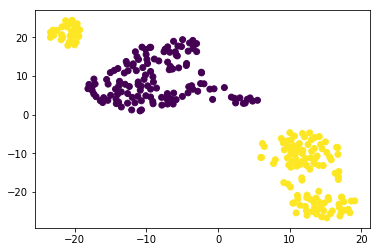

In [9]:
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=train_y[:, 0])

In [10]:
# train on low dimensional data to visualize
my_svm = my_SVM()
my_svm.train(reduced_x, train_y)

0/1000 ---错误分类----270
50/1000 ---错误分类----116
100/1000 ---错误分类----116
150/1000 ---错误分类----115
200/1000 ---错误分类----115
250/1000 ---错误分类----113
300/1000 ---错误分类----114
350/1000 ---错误分类----116
400/1000 ---错误分类----115
450/1000 ---错误分类----114
500/1000 ---错误分类----115
550/1000 ---错误分类----114
600/1000 ---错误分类----114
650/1000 ---错误分类----116
700/1000 ---错误分类----115
750/1000 ---错误分类----114
800/1000 ---错误分类----115
850/1000 ---错误分类----114
900/1000 ---错误分类----115
950/1000 ---错误分类----114
train accuracy: 87.7778 %


In [11]:
x_grid = np.arange(-25, 25, 0.5).reshape(100, 1)
y_grid = np.arange(-25, 25, 0.5).reshape(100, 1)

In [12]:
print(x_grid.shape, y_grid.shape)

(100, 1) (100, 1)


In [13]:
coor = []
for x in x_grid:
    for y in y_grid:
        coor.append([x, y])
x_ = np.array(coor)

In [14]:
print(x_.shape)
y_ = my_svm.predict(x_[:, :, 0])
print(y_.shape)

(10000, 2, 1)
(10000, 1)


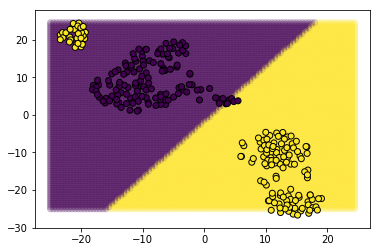

In [75]:
plt.scatter(x_[:, 0, 0], x_[:, 1, 0], c=y_[:, 0] , alpha=0.2)
plt.scatter(reduced_x[:, 0], reduced_x[:, 1], c=train_y[:, 0], edgecolor='black', alpha=1)
plt.show()